In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import plotly.tools as tls
import plotly.plotly as py

bf = pd.read_csv('../Dataset/black_friday.csv', engine = 'python',header = None)
bf.head(10)


,0
0,8370
1,15200
2,1422
3,1057
4,7969
5,15227
6,19215
7,15854
8,15686
9,7871


In [3]:
bf.tail(10)

,0
537567,1994
537568,5930
537569,7042
537570,15491
537571,11852
537572,11664
537573,19196
537574,8043
537575,7172
537576,6875


# Statical Description

In [4]:
purchase = bf[0]
Min = purchase.min()
print("Minimum value = " + str(Min))

Max = purchase.max()
print("Makimum value = " + str(Max))

Mean = purchase.mean()
print("Mean value = " + str(Mean))

Mode = purchase.mode()[0]
print("Mode value = " + str(Mode))

Median = purchase.median()
print("Median value = " + str(Median))

Variance = purchase.var()
print("Variance value = " + str(Variance))

std = purchase.std()
print("Standard Deviation value = " + str(std))

skew = purchase.std()
print("Skewness value  = " + str(skew))

kur = purchase.kurtosis()
print("Kurtosis value = " + str(kur))

Minimum value = 185
Makimum value = 23961
Mean value = 9333.859852635065
Mode value = 6855
Median value = 8062.0
Variance value = 24810581.486013696
Standard Deviation value = 4981.022132656479
Skewness value  = 4981.022132656479
Kurtosis value = -0.34312137256836284


# Visualisasi Data Histogram

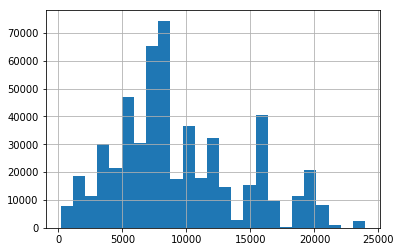

In [5]:
bin_size = 25
purchase.hist(bins = bin_size)

# Visualisasi Data Box Plot

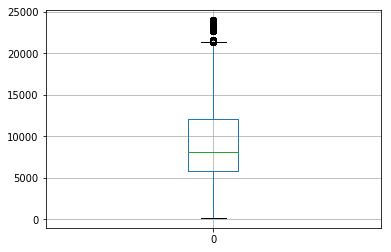

In [6]:
bf.boxplot()

In [7]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,
        st.beta,
        st.gamma,
        st.norm,
        st.uniform
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [32]:
def Miskin(data) :
    count = 0
    for i in data :
        if(data[i]<1000):
            count = count+1
    return count

def Kaya(data) :
    count = 0
    for i in data :
        if(data[i]>10000):
            count = count+1
    return count

def CrazyRich(data) :
    count = 0
    for i in data :
        if(data[i]>20000):
            count = count+1
    return count

In [29]:
Jumlah_Miskin = Miskin(purchase)
Jumlah_Kaya = Kaya(purchase)
Jumlah_CrazyRich = CrazyRich(purchase)

data = []
data.append(Jumlah_Miskin)
data.append(Jumlah_Kaya)
data.append(Jumlah_CrazyRich)

In [27]:
Ekspetasi_Miskin = 250*Jumlah_Miskin/len(purchase)
Ekspetasi_Kaya = 250*Jumlah_Kaya/len(purchase)
Ekspetasi_CrazyRich = 250*Jumlah_CrazyRich/len(purchase)

# A. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspetasi jumlah orang miskin, kaya, dan crazy rich 

i. Ekspetasi jumlah orang miskin

In [33]:
print(Ekspetasi_Miskin)

3.284651844576395


ii. Ekspetasi jumlah orang kaya

In [34]:
print(Ekspetasi_Kaya)

83.76024971352888


iii. Ekspetasi jumlah orang Crazy Rich

In [35]:
print(Ekspetasi_CrazyRich)

5.169966665178505


In [36]:
def Galaxy(data) :
    count = 0
    for i in data :
        if(data[i]>1980) and data[i]<2000:
            count = count+1
    return count

def Mac(data) :
    count = 0
    for i in data :
        if(data[i]>2707) and data[i]<2897:
            count = count+1
    return count
    

In [39]:
Jumlah_Galaxy = Galaxy(purchase)
Jumlah_Mac = Mac(purchase)
Ekspetasi_Galaxy = 1000*Jumlah_Galaxy/len(purchase)
Ekspetasi_Mac = 1000*Jumlah_Mac/len(purchase)

# B. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang pengeluarannya membeli Galaxy Fold dan MacBook Pro+ iPhone XR + AirPods

i. Ekspetasi jumlah orang pembeli Galaxy Fold

In [42]:
print(Ekspetasi_Galaxy)

0.9226602378082355


ii. Ekspetasi jumlah orang pembeli MacBook Pro Touch Bar 256GB + iPhone XR + AirPods 2

In [41]:
print(Ekspetasi_Mac)

7.146896438829114
